In [2]:
import pandas as pd
import datetime

In [3]:
df_links = pd.read_csv("Data/links.csv")
df_links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [4]:
df_movies = pd.read_csv("Data/movies.csv")
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
df_ratings = pd.read_csv("Data/ratings.csv")
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [5]:
df_tags = pd.read_csv("Data/tags.csv")
df_tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [6]:
####
"""
All code can join on movieID

"""

'\nAll code can join on movieID\n\n'

In [7]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [8]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [9]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [10]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [11]:
movie_df = df_links.merge(df_movies, on='movieId').merge(df_ratings, on='movieId').merge(df_tags, on='movieId')


In [12]:
movie_df.head()

,movieId,imdbId,tmdbId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825


In [20]:
sum(movie_df['title'] == 'Toy Story (1995)')

645

In [21]:
pd.set_option('display.max_rows', None)

In [22]:
movie_df['tag'].value_counts()

sci-fi                                                                                   2527
thought-provoking                                                                        2487
twist ending                                                                             2434
atmospheric                                                                              2227
dark comedy                                                                              2056
superhero                                                                                1787
psychology                                                                               1750
Disney                                                                                   1748
time travel                                                                              1730
suspense                                                                                 1716
classic                                                     

In [13]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233213 entries, 0 to 233212
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      233213 non-null  int64  
 1   imdbId       233213 non-null  int64  
 2   tmdbId       233213 non-null  float64
 3   title        233213 non-null  object 
 4   genres       233213 non-null  object 
 5   userId_x     233213 non-null  int64  
 6   rating       233213 non-null  float64
 7   timestamp_x  233213 non-null  int64  
 8   userId_y     233213 non-null  int64  
 9   tag          233213 non-null  object 
 10  timestamp_y  233213 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 21.4+ MB


In [14]:
movie_df['movieId'].value_counts()

296     55567
2959    11772
260      6526
293      4655
924      4469
        ...  
1893        1
6245        1
7141        1
3816        1
8188        1
Name: movieId, Length: 1554, dtype: int64

In [15]:
movie_df['imdbId'].value_counts()

110912    55567
137523    11772
76759      6526
110413     4655
62622      4469
          ...  
116692        1
33149         1
309820        1
41699         1
116141        1
Name: imdbId, Length: 1554, dtype: int64

In [16]:
movie_df['tmdbId'].value_counts()

680.0      55567
550.0      11772
11.0        6526
101.0       4655
62.0        4469
           ...  
42130.0        1
42122.0        1
21027.0        1
14594.0        1
14595.0        1
Name: tmdbId, Length: 1554, dtype: int64

In [17]:
movie_df['title'].value_counts()

Pulp Fiction (1994)                                               55567
Fight Club (1999)                                                 11772
Star Wars: Episode IV - A New Hope (1977)                          6526
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)     4655
2001: A Space Odyssey (1968)                                       4469
                                                                  ...  
Mildred Pierce (1945)                                                 1
Secret Lives of Dentists, The (2002)                                  1
Ghosts of the Abyss (2003)                                            1
Talk of the Town, The (1942)                                          1
Lust for Life (1956)                                                  1
Name: title, Length: 1554, dtype: int64

In [18]:
movie_df['genres'].value_counts()

Comedy|Crime|Drama|Thriller                56851
Action|Crime|Drama|Thriller                16725
Action|Adventure|Sci-Fi                    11939
Drama                                       6242
Comedy                                      5486
                                           ...  
Action|Animation|Comedy|Horror|Thriller        1
Drama|Fantasy|Musical|Romance                  1
Adventure|Comedy|Crime|Drama|Romance           1
Drama|Fantasy|Horror                           1
Drama|Thriller|Western                         1
Name: genres, Length: 370, dtype: int64

In [19]:
movie_df['userId_x'].value_counts()

474    2455
414    2343
599    2100
68     1791
610    1701
       ... 
406      10
499       9
207       8
578       6
175       5
Name: userId_x, Length: 610, dtype: int64

In [20]:
movie_df['rating'].value_counts()

4.0    64781
5.0    63845
4.5    31502
3.0    28550
3.5    22895
2.0     7955
2.5     6488
1.0     3721
0.5     1908
1.5     1568
Name: rating, dtype: int64

In [21]:
movie_df['timestamp_x'].value_counts()

1459787998    263
829760898     249
829828006     232
966597447     219
942843185     217
             ... 
1490115182      1
1158531708      1
1258427015      1
1083589261      1
1171816464      1
Name: timestamp_x, Length: 42210, dtype: int64

In [22]:
movie_df['userId_y'].value_counts()

599    75368
474    50498
424    24482
477    19350
567    17081
62     14139
537     7507
357     3558
193     2278
184     2112
318     1438
103     1423
125     1219
573     1026
533      987
119      754
205      753
112      753
336      741
435      613
166      590
18       555
319      516
63       502
76       502
341      502
327      473
305      411
289      407
2        279
439      268
513      221
49       219
606      207
291      163
106      132
177      123
506      114
487      114
7        107
167       99
21        94
226       92
300       74
356       74
419       70
132       68
520       41
600       28
274       26
610       25
256       12
161       11
138        6
462        5
509        3
Name: userId_y, dtype: int64

In [23]:
movie_df['tag'].value_counts()

sci-fi               2527
thought-provoking    2487
twist ending         2434
atmospheric          2227
dark comedy          2056
                     ... 
Chile                   1
Stephen Crane           1
symbolic                1
Othello                 1
britpop                 1
Name: tag, Length: 1584, dtype: int64

In [24]:
movie_df['timestamp_y'].value_counts()

1424753866    987
1431954555    921
1137375519    658
1137206826    591
1137207127    588
             ... 
1137192041      1
1137179753      1
1137201677      1
1137375762      1
1137202093      1
Name: timestamp_y, Length: 3392, dtype: int64

In [25]:
movie_df['rating'].value_counts()

4.0    64781
5.0    63845
4.5    31502
3.0    28550
3.5    22895
2.0     7955
2.5     6488
1.0     3721
0.5     1908
1.5     1568
Name: rating, dtype: int64

FILTERING BY RATINGS OVER 3.5

In [18]:
filtered_df = movie_df[movie_df['rating'] >= 3.0]

sorted_df = filtered_df.sort_values('rating', ascending=False)
sorted_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 211573 entries, 66727 to 70309
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      211573 non-null  int64  
 1   imdbId       211573 non-null  int64  
 2   tmdbId       211573 non-null  float64
 3   title        211573 non-null  object 
 4   genres       211573 non-null  object 
 5   userId_x     211573 non-null  int64  
 6   rating       211573 non-null  float64
 7   timestamp_x  211573 non-null  int64  
 8   userId_y     211573 non-null  int64  
 9   tag          211573 non-null  object 
 10  timestamp_y  211573 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 19.4+ MB


CONVERTING TIMESTAMPS INTO DATES

In [27]:
sorted_df['date_x'] = sorted_df['timestamp_x'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
sorted_df.head()



,movieId,imdbId,tmdbId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y,date_x
115021,1197,93779,2493.0,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,68,5.0,1158531521,474,Inigo Montoya,1137202999,2006-09-17 18:18:41
80047,296,110912,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,610,5.0,1479545817,599,crime,1498456353,2016-11-19 03:56:57
80065,296,110912,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,610,5.0,1479545817,599,drugs & music,1498456655,2016-11-19 03:56:57
80064,296,110912,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,610,5.0,1479545817,599,drugs,1498456348,2016-11-19 03:56:57
80063,296,110912,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,610,5.0,1479545817,599,drug overdose,1498456656,2016-11-19 03:56:57


In [29]:
sorted_df['date_y'] = sorted_df['timestamp_y'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
sorted_df.head()



,movieId,imdbId,tmdbId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y,date_x,date_y
115021,1197,93779,2493.0,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,68,5.0,1158531521,474,Inigo Montoya,1137202999,2006-09-17 18:18:41,2006-01-13 20:43:19
80047,296,110912,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,610,5.0,1479545817,599,crime,1498456353,2016-11-19 03:56:57,2017-06-26 01:52:33
80065,296,110912,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,610,5.0,1479545817,599,drugs & music,1498456655,2016-11-19 03:56:57,2017-06-26 01:57:35
80064,296,110912,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,610,5.0,1479545817,599,drugs,1498456348,2016-11-19 03:56:57,2017-06-26 01:52:28
80063,296,110912,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,610,5.0,1479545817,599,drug overdose,1498456656,2016-11-19 03:56:57,2017-06-26 01:57:36


In [ ]:
#######
###### Calculate timing between each timestamp and input amount of time in minutes. 

In [28]:
cause an error here!!!!

NameError: name 'gnaongerwf' is not defined

In [14]:
import surprise
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

reader = surprise.Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(movie_df[['title', 'movieId', 'rating']], reader)

train, test = train_test_split(data, test_size=0.2, random_state=42)


In [16]:
from surprise import KNNBasic

model = KNNBasic().fit(train)

NameError: name 'train' is not defined

In [ ]:
surprise.accuracy.mae(model.test(test))
surprise.accuracy.rmse(model.test(test))

In [ ]:
from surprise import SVD

model2 = SVD().fit(train)

In [ ]:
surprise.accuracy.mae(model2.test(test))
surprise.accuracy.rmse(model2.test(test))

In [ ]:
from surprise import NMF

model3 = NMF().fit(train)

In [ ]:
surprise.accuracy.mae(model3.test(test))
surprise.accuracy.rmse(model3.test(test))

# Database cleaning!

In [3]:
import pandas as pd
import datetime

In [4]:
df_movies = pd.read_csv("Data/movies.csv")
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df_ratings = pd.read_csv("Data/ratings.csv")
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
df_ratings.drop(columns='timestamp', inplace=True)

In [7]:
df_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [8]:
df_cleaned = df_movies.merge(df_ratings, on='movieId')

In [9]:
df_cleaned.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


In [10]:
ratings_userid = df_cleaned[['userId','rating']]

In [11]:
ratings_userid.head()

,userId,rating
0,1,4.0
1,5,4.0
2,7,4.5
3,15,2.5
4,17,4.5


In [12]:
#pd.set_option('display.max_rows', None)

In [13]:
ratings_userid['userId'].value_counts().sort_values(ascending=False)

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
194      20
576      20
207      20
320      20
442      20
Name: userId, Length: 610, dtype: int64

In [14]:
userid_genre = df_cleaned[['userId','genres']]

In [15]:
userid_genre['genres'].value_counts().sort_values(ascending=False)

Comedy                                            7196
Drama                                             6291
Comedy|Romance                                    3967
Comedy|Drama|Romance                              3000
Comedy|Drama                                      2851
                                                  ... 
Comedy|Crime|Drama|Western                           1
Drama|Fantasy|Musical|Mystery|Sci-Fi                 1
Children|Crime|Drama                                 1
Action|Adventure|Comedy|Drama|Fantasy|Thriller       1
Animation|Comedy|Drama|Romance                       1
Name: genres, Length: 951, dtype: int64

In [16]:
genres_split = df_cleaned.genres.apply(lambda x: x.split(sep='|')).apply(pd.value_counts, 1).fillna(0)
df_cleaned = pd.concat([df_cleaned.iloc[:,:], genres_split], axis=1)
df_cleaned.head()



,movieId,title,genres,userId,rating,Adventure,Children,Fantasy,Animation,Comedy,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df_cleaned['(no genres listed)'].sum()

47.0

In [18]:
df_cleaned.drop(columns=['(no genres listed)'], inplace=True)

In [19]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      100836 non-null  int64  
 1   title        100836 non-null  object 
 2   genres       100836 non-null  object 
 3   userId       100836 non-null  int64  
 4   rating       100836 non-null  float64
 5   Adventure    100836 non-null  float64
 6   Children     100836 non-null  float64
 7   Fantasy      100836 non-null  float64
 8   Animation    100836 non-null  float64
 9   Comedy       100836 non-null  float64
 10  Romance      100836 non-null  float64
 11  Drama        100836 non-null  float64
 12  Crime        100836 non-null  float64
 13  Action       100836 non-null  float64
 14  Thriller     100836 non-null  float64
 15  Horror       100836 non-null  float64
 16  Mystery      100836 non-null  float64
 17  Sci-Fi       100836 non-null  float64
 18  War          100836 non-

In [20]:
df_cleaned['title']

0                                  Toy Story (1995)
1                                  Toy Story (1995)
2                                  Toy Story (1995)
3                                  Toy Story (1995)
4                                  Toy Story (1995)
                            ...                    
100831    Black Butler: Book of the Atlantic (2017)
100832                 No Game No Life: Zero (2017)
100833                                 Flint (2017)
100834          Bungo Stray Dogs: Dead Apple (2018)
100835          Andrew Dice Clay: Dice Rules (1991)
Name: title, Length: 100836, dtype: object

In [20]:
### Create new column of 90s, 80s, 70s, 60s, 50, etc. Get out the year!!!!!
#df_cleaned['year'] = df_cleaned['title'].str[-5:-1]
#df_cleaned.head()

In [21]:
import re

def extract_year(title):
    match = re.search('\((\d{4})\)', title)
    if match:
        return match.group(1)
    else:
        return None

df_cleaned['year'] = df_cleaned['title'].apply(extract_year)

In [22]:
df_cleaned['year'].sort_values(ascending=True)

79586     1902
79588     1902
79589     1902
79590     1902
79587     1902
          ... 
100427    None
100428    None
100431    None
100448    None
100601    None
Name: year, Length: 100836, dtype: object

In [23]:
df_cleaned['year'].isna().sum()

18

In [24]:
df_cleaned.dropna(subset=['year'], inplace=True)

In [25]:
df_cleaned['year'].isna().sum()

0

In [26]:
df_cleaned.head()

,movieId,title,genres,userId,rating,Adventure,Children,Fantasy,Animation,Comedy,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995


In [27]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100818 entries, 0 to 100835
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      100818 non-null  int64  
 1   title        100818 non-null  object 
 2   genres       100818 non-null  object 
 3   userId       100818 non-null  int64  
 4   rating       100818 non-null  float64
 5   Adventure    100818 non-null  float64
 6   Children     100818 non-null  float64
 7   Fantasy      100818 non-null  float64
 8   Animation    100818 non-null  float64
 9   Comedy       100818 non-null  float64
 10  Romance      100818 non-null  float64
 11  Drama        100818 non-null  float64
 12  Crime        100818 non-null  float64
 13  Action       100818 non-null  float64
 14  Thriller     100818 non-null  float64
 15  Horror       100818 non-null  float64
 16  Mystery      100818 non-null  float64
 17  Sci-Fi       100818 non-null  float64
 18  War          100818 non-

In [28]:
df_cleaned['year'] = df_cleaned['year'].astype('int')

In [45]:
#pd.set_option('display.max_rows', None)

In [46]:
#pd.reset_option('display.max_rows')

In [29]:
df_cleaned['year'].value_counts()

1995    6144
1994    5296
1999    4536
1996    4509
2000    4268
        ... 
1903       2
1908       1
1915       1
1919       1
1917       1
Name: year, Length: 106, dtype: int64

In [30]:
#Create new columns for each decade of movie

df_cleaned['1900s'] = ((df_cleaned['year'] >= 1900) & (df_cleaned['year'] < 1910)).astype(float)
df_cleaned['1910s'] = ((df_cleaned['year'] >= 1910) & (df_cleaned['year'] < 1920)).astype(float)
df_cleaned['1920s'] = ((df_cleaned['year'] >= 1920) & (df_cleaned['year'] < 1930)).astype(float)
df_cleaned['1930s'] = ((df_cleaned['year'] >= 1930) & (df_cleaned['year'] < 1940)).astype(float)
df_cleaned['1940s'] = ((df_cleaned['year'] >= 1940) & (df_cleaned['year'] < 1950)).astype(float)
df_cleaned['1950s'] = ((df_cleaned['year'] >= 1950) & (df_cleaned['year'] < 1960)).astype(float)
df_cleaned['1960s'] = ((df_cleaned['year'] >= 1960) & (df_cleaned['year'] < 1970)).astype(float)
df_cleaned['1970s'] = ((df_cleaned['year'] >= 1970) & (df_cleaned['year'] < 1980)).astype(float)
df_cleaned['1980s'] = ((df_cleaned['year'] >= 1980) & (df_cleaned['year'] < 1990)).astype(float)
df_cleaned['1990s'] = ((df_cleaned['year'] >= 1990) & (df_cleaned['year'] < 2000)).astype(float)
df_cleaned['2000s'] = ((df_cleaned['year'] >= 2000) & (df_cleaned['year'] < 2010)).astype(float)
df_cleaned['2010s'] = ((df_cleaned['year'] >= 2010) & (df_cleaned['year'] < 2020)).astype(float)

In [31]:
df_cleaned.head()

,movieId,title,genres,userId,rating,Adventure,Children,Fantasy,Animation,Comedy,...,1920s,1930s,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100818 entries, 0 to 100835
Data columns (total 37 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      100818 non-null  int64  
 1   title        100818 non-null  object 
 2   genres       100818 non-null  object 
 3   userId       100818 non-null  int64  
 4   rating       100818 non-null  float64
 5   Adventure    100818 non-null  float64
 6   Children     100818 non-null  float64
 7   Fantasy      100818 non-null  float64
 8   Animation    100818 non-null  float64
 9   Comedy       100818 non-null  float64
 10  Romance      100818 non-null  float64
 11  Drama        100818 non-null  float64
 12  Crime        100818 non-null  float64
 13  Action       100818 non-null  float64
 14  Thriller     100818 non-null  float64
 15  Horror       100818 non-null  float64
 16  Mystery      100818 non-null  float64
 17  Sci-Fi       100818 non-null  float64
 18  War          100818 non-

In [35]:
df_clean = df_cleaned[df_cleaned['rating'] >= 3.0]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81748 entries, 0 to 100835
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movieId      81748 non-null  int64  
 1   title        81748 non-null  object 
 2   genres       81748 non-null  object 
 3   userId       81748 non-null  int64  
 4   rating       81748 non-null  float64
 5   Adventure    81748 non-null  float64
 6   Children     81748 non-null  float64
 7   Fantasy      81748 non-null  float64
 8   Animation    81748 non-null  float64
 9   Comedy       81748 non-null  float64
 10  Romance      81748 non-null  float64
 11  Drama        81748 non-null  float64
 12  Crime        81748 non-null  float64
 13  Action       81748 non-null  float64
 14  Thriller     81748 non-null  float64
 15  Horror       81748 non-null  float64
 16  Mystery      81748 non-null  float64
 17  Sci-Fi       81748 non-null  float64
 18  War          81748 non-null  float64
 19  Mus

# Plotting Graphs

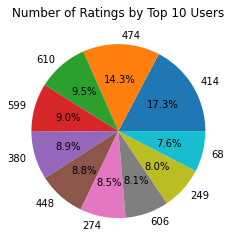

In [44]:
import matplotlib.pyplot as plt

# group the data by userId and count the number of ratings for each user
user_ratings_counts = df_clean.groupby('userId')['rating'].count()

# get the top 100 users by rating count
top_10_users = user_ratings_counts.sort_values(ascending=False)[:10]

# create a pie chart of the user rating counts for the top 100 users
plt.pie(top_10_users.values, labels=top_10_users.index, autopct='%1.1f%%')
plt.title('Number of Ratings by Top 10 Users')
plt.show()

In [48]:
df_clean['num_viewers'] = df_clean.groupby('movieId')['userId'].transform('count')


In [49]:
df_clean.head()

,movieId,title,genres,userId,rating,Adventure,Children,Fantasy,Animation,Comedy,...,1930s,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s,num_viewers
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,199
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,199
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,199
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,199
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,199


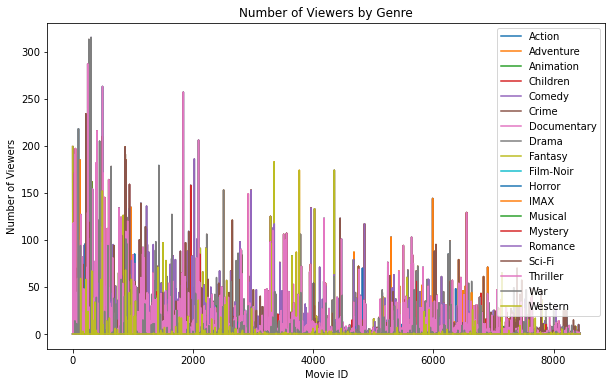

In [52]:
genres_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
plt.figure(figsize=(10, 6))
for col in genres_cols:
    plt.plot(grouped[col], label=col)
plt.legend()
plt.xlabel('Movie ID')
plt.ylabel('Number of Viewers')
plt.title('Number of Viewers by Genre')
plt.show()

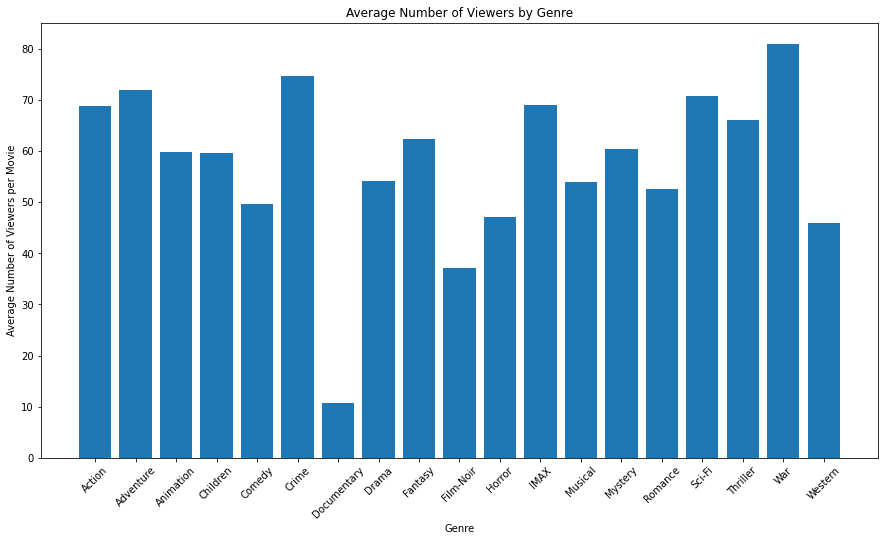

In [67]:
genres_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Multiply each column by the number of viewers, and sum the results for each genre
genre_views = df_clean[genres_cols].multiply(df_clean['num_viewers'], axis=0).sum()

# Count the number of movies for each genre
genre_counts = df_clean[genres_cols].apply(lambda x: (x == 1.0).sum())

# Divide the sum of viewers by the number of movies to get the average number of viewers per movie for each genre
genre_avg_views = genre_views / genre_counts

# Plot the results
plt.figure(figsize=(15, 8))
plt.bar(genres_cols, genre_avg_views)
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.ylabel('Average Number of Viewers per Movie')
plt.title('Average Number of Viewers by Genre')
plt.show()


# Testing out Modeling

In [27]:
import surprise
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

In [52]:
reader = Reader(rating_scale=(1.0, 5.0))
data = Dataset.load_from_df(df_cleaned[['userId', 'movieId', 'rating']], reader)


In [53]:
train, test = train_test_split(data, test_size=0.2, random_state=42)


In [40]:
from surprise import KNNBasic

model = KNNBasic().fit(train)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [41]:
surprise.accuracy.mae(model.test(test))
surprise.accuracy.rmse(model.test(test))

MAE:  0.5251
RMSE: 0.6432


0.6432395736952233

In [54]:
from surprise import SVD

model2 = SVD().fit(train)

In [55]:
surprise.accuracy.mae(model2.test(test))
surprise.accuracy.rmse(model2.test(test))

MAE:  0.4870
RMSE: 0.5979


0.5978986373941764

In [44]:
from surprise import NMF

model3 = NMF().fit(train)

In [45]:
surprise.accuracy.mae(model3.test(test))
surprise.accuracy.rmse(model3.test(test))

MAE:  0.5164
RMSE: 0.6441


0.6441014725423281

In [48]:
cross_validate(model2, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5969  0.6002  0.5948  0.5960  0.5990  0.5974  0.0020  
MAE (testset)     0.4875  0.4898  0.4855  0.4847  0.4870  0.4869  0.0018  
Fit time          3.62    3.58    3.66    3.70    3.66    3.65    0.04    
Test time         0.07    0.07    0.06    0.06    0.06    0.06    0.00    


{'test_rmse': array([0.59693603, 0.60023608, 0.59479896, 0.59600851, 0.59902782]),
 'test_mae': array([0.487544  , 0.48977568, 0.485502  , 0.48468382, 0.48700539]),
 'fit_time': (3.6191999912261963,
  3.5813281536102295,
  3.6616969108581543,
  3.7036900520324707,
  3.661216974258423),
 'test_time': (0.06599020957946777,
  0.06673622131347656,
  0.05965089797973633,
  0.06446504592895508,
  0.06116604804992676)}

In [34]:
import surprise
from surprise import Dataset, Reader
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise.prediction_algorithms.matrix_factorization import SVD

In [41]:
#reader = Reader(rating_scale=(1.0, 5.0))
#data = Dataset.load_from_df(df_cleaned[['userId', 'movieId', 'rating']], reader)
#
#trainset, testset = train_test_split(data, test_size=0.4)
#

In [36]:
#param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
#              'reg_all': [0.4, 0.6]}

In [31]:
#algo = surprise.SVD()
#algo.fit(trainset)

In [3]:
#print(type(algo))


In [2]:
#predictions
#predictions = algo.test(testset)


In [4]:
#accuracy.rmse(predictions)
#accuracy.mae(predictions)
#accuracy.fcp(predictions)

In [37]:
# Create the grid search object
#gs = GridSearchCV(algo, param_grid, measures=['rmse', 'mae'])

In [1]:
## Define the evaluation metrics to use for the grid search
#eval_metrics = ['rmse', 'mae']
#
## Perform grid search using cross-validation
#gs = GridSearchCV(algo, param_grid, measures=eval_metrics, cv=5)
#gs.fit(data)
#
## Print the best RMSE score and corresponding parameters
#print(gs.best_score['rmse'])
#print(gs.best_params['rmse'])
#
## Print the best MAE score and corresponding parameters
#print(gs.best_score['mae'])
#print(gs.best_params['mae'])

In [39]:
SVD = SVD()

In [42]:
from surprise.model_selection import RandomizedSearchCV
from surprise import SVD

# Define the search space for hyperparameters
param_distributions = {'n_factors': [50, 100, 200],
                       'n_epochs': [10, 20, 30],
                       'lr_all': [0.002, 0.005, 0.01],
                       'reg_all': [0.02, 0.1, 0.4]}

# Create the randomized search object
rs = RandomizedSearchCV(SVD, param_distributions, n_iter=10, measures=['rmse', 'mae'], cv=5)

# Run the randomized search
rs.fit(data)

# Get the best RMSE score and the corresponding hyperparameters
best_rmse = rs.best_score['rmse']
best_params = rs.best_params['rmse']


In [44]:
print('Best RMSE: ' + str(best_rmse))

Best RMSE: 0.8540485033461396


In [45]:
print('Best Params: ' + str(best_params))

Best Params: {'n_factors': 100, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1}
